In [3]:
"예제 2.1"
import cv2
import numpy as np

imageFile = '0205.png\cat.jpg'
img = cv2.imread(imageFile)
img2 = cv2.imread(imageFile,0)

cv2.imshow('cat color',img)
cv2.imshow('cat gray',img2)

cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
#예제 2.2
import cv2
import numpy as np

imageFile = '0205.png\cat.jpg'
img = cv2.imread(imageFile)

cv2.imwrite('example\cat.bmp',img)
cv2.imwrite('example\cat.png',img)
cv2.imwrite('example\cat2.png',img, [cv2.IMWRITE_PNG_COMPRESSION,9])

True

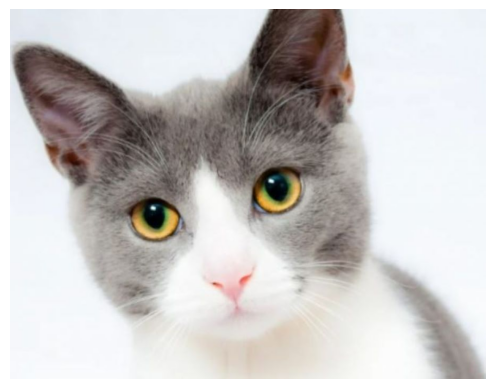

In [5]:
#예제2.3
import cv2
from matplotlib import pyplot as plt

imageFile = '0205.png\image_1.jpg'
imgBGR = cv2.imread(imageFile)
plt.axis('off')
#plt.imshow(imgBGR)
#plt.show()

imgRGB = cv2.cvtColor(imgBGR,cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)

plt.show()

In [ ]:
#예제2.4
import cv2
from matplotlib import pyplot as plt

imageFile = '0205.png\image_1.jpg'
imgGray = cv2.imread(imageFile, cv2.IMREAD_GRAYSCALE)
plt.axis('off')

plt.imshow(imgGray, cmap="gray", interpolation= 'bicubic')
#plt.imshow(cv2.cvtColor(imgGray,cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
#예제2.5
import cv2
from matplotlib import pyplot as plt

imageFile = '0205.png\image_1.jpg'
imgGray = cv2.imread(imageFile, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize = (6,6))

plt.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1)
plt.imshow(imgGray, cmap= 'gray')

plt.axis('off')
plt.savefig('example\exfile\cat7.png')
plt.show()

In [ ]:
#예제 2.6
import cv2
from matplotlib import pyplot as plt
#matplotlib는 두 가지 방법이 있다(stateless,stateful)
#(1)figure,ax지정/(2)현재의 figure에 현재ax plot
path = '0205.png'
imgBGR1 = cv2.imread(path +'\cat.jpg')
imgBGR2 = cv2.imread(path +'\image_1.jpg')
imgBGR3 = cv2.imread(path +'\image_2.jpg')
imgBGR4 = cv2.imread(path +'\image_3.jpg')

imgRGB1 = cv2.cvtColor(imgBGR1, cv2.COLOR_BGR2RGB)
imgRGB2 = cv2.cvtColor(imgBGR2, cv2.COLOR_BGR2RGB)
imgRGB3 = cv2.cvtColor(imgBGR3, cv2.COLOR_BGR2RGB)
imgRGB4 = cv2.cvtColor(imgBGR4, cv2.COLOR_BGR2RGB)

 #1. fig = plt.figure() : ax 없는 빈 figure 생성 (후에 ax를 추가해줘야함)
 #2. fig, ax = plt.subplots() : 하나의 ax 만을 가지는 하나의 figure 생성
 #3. fig, axes = plt.subplots(2,2) : 4개(2*2)이 ax들을 가지는 하나의 figure 생성
fig,ax = plt.subplots(2,2,figsize = (6,6), sharey = True)
fig.canvas.manager.set_window_title('Sample Pictures')

ax[0][0].axis('off')
ax[0][0].imshow(imgRGB1, aspect = 'auto')

ax[0][1].axis('off')
ax[0][1].imshow(imgRGB2, aspect = 'auto')

ax[1][0].axis('off')
ax[1][0].imshow(imgRGB3, aspect = 'auto')

ax[1][1].axis('off')
ax[1][1].imshow(imgRGB4, aspect = 'auto')

plt.subplots_adjust(left=0, bottom=0, right=1,top=1,wspace=0.05,hspace=0.05)

plt.savefig("0206.png", bbox_inches = 'tight')
plt.show()

In [1]:
#예제 2.7
import cv2

cap = cv2.VideoCapture(0)

cap.set(cv2.CAP_PROP_FRAME_WIDTH,320)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT,240)

frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
              int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size',frame_size)

while True:

    retval, frame = cap.read()

    if not retval:
        break

    cv2.imshow('frame',frame)

    key = cv2.waitKey(25)
    if key ==27:
        break
if cap.isOpened():
    cap.release()
cv2.destroyAllWindows()

frame_size (320, 240)


In [ ]:
#예제 2.8
import cv2

cap = cv2.VideoCapture('http://192.168.0.229:4747/mjpegfeed')

cap.set(cv2.CAP_PROP_FRAME_WIDTH,320)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT,240)

frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
              int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size',frame_size)

while True:

    retval, frame = cap.read()

    if not retval:
        break

    cv2.imshow('frame',frame)

    key = cv2.waitKey(25)
    if key ==27:
        break
if cap.isOpened():
    cap.release()
cv2.destroyAllWindows()

In [14]:
#예제 2.10
import cv2

cap = cv2.VideoCapture(0)
frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
              int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_size =', frame_size)

#fourcc = cv2.VideoWriter_fourcc(*'DIVX')
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

out1 = cv2.VideoWriter('example\\record0.mp4',
                       fourcc,20.0, frame_size)
out2 = cv2.VideoWriter('example\\record1.mp4',
                       fourcc,20.0, frame_size,
                       isColor = False)
while True:
    retval, frame = cap.read()
    if not retval:
        break
    
    out1.write(frame)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    out2.write(gray)

    cv2.imshow('frame', frame)
    cv2.imshow('gray', gray)

    key = cv2.waitKey(25)
    if key ==27:
        break
cap.release()
out1.release()
out2.release()
cv2.destroyAllWindows()



frame_size = (640, 480)


In [ ]:
#예제 2.11
import cv2
import matplotlib.pyplot as plt

#1 Esc키가 눌렸는지 확인,종료 + 아래 내용 출력
def handle_key_press(event):
    if event.key == 'escape':
        cap.release()
        plt.close()
def handle_close(evt):
    print('Close figure!')
    cap.release()

#2 프로그램 시작
cap = cv2.VideoCapture(0)

plt.ion() # 대화모드 설정
fig = plt.figure(figsize=(10,6))
plt.axis('off')
#ax = fig.gca()
#ax.set_axis_off()
fig.canvas.manager.set_window_title('Video Capture')
fig.canvas.mpl_connect('key_press_event', handle_key_press)
fig.canvas.mpl_connect('close_event', handle_close)
retval, frame = cap.read() # 첫 프레임 캡쳐
im = plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

#3
while True:
    retval, frame = cap.read()    # 프레임 캡쳐
    if not retval:
        break
    #plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    im.set_array(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    #fig.canvas.draw_idle()
    fig.canvas.flush_events()   # 실시간 업데이트

if cap.isOpened():
    cap.release()

In [ ]:
#예제 2.12
import cv2
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 프로그램 시작
cap = cv2.VideoCapture(0)
fig = plt.figure(figsize=(10,6))
fig.canvas.manager.set_window_title('Video Capture')
plt.axis('off')

def init():           #애니메이션 초기화를 위해 한번부름
    global im
    retval, frame = cap.read()
    im = plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
##    return im,

def updateFrame(k):       #인수가 없으면 연속x
    retval, frame = cap.read()
    if retval:
        im.set_array(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

ani = animation.FuncAnimation(fig, updateFrame, init_func= init,
                              interval = 50)
plt.show()
if cap.isOpened():
    cap.release()

In [ ]:
#예제 2.13
import cv2
import matplotlib.pyplot as plt
import matplotlib.animation as animation
'''
class 클래스이름:
    def 메서드이름(self):
        명령블록
'''
class Video:
    def __init__(self, device = 0):
        self.cap = cv2.VideoCapture(device)
        self.retval, self.frame = self.cap.read()
        self.im = plt.imshow(cv2.cvtColor(self.frame,
                                          cv2.COLOR_BGR2RGB))
        print('start capture ...')

    def updateFrame(self, k):
        self.retval, self.frame = self.cap.read()
        self.im.set_array(cv2.cvtColor(camera.frame,
                                       cv2.COLOR_BGR2RGB))
        #return self.im,

    def close(self):
        if self.cap.isOpened():
            self.cap.release()
        print('finish capture.')

# 프로그램 시작
fig = plt.figure()
fig.canvas.manager.set_window_title('Video Capture')
plt.axis("off")

camera = Video()  #camera = Video(내 동영상 파일)
ani = animation.FuncAnimation(fig, camera.updateFrame,
                              interval = 50)
plt.show()
camera.close()

In [ ]:
#예제 2.14
import cv2
import matplotlib.pyplot as plt
import matplotlib.animation as animation

class Video(animation.FuncAnimation):
    def __init__(self, device = 0, fig = None, frames = None,
                  interval = 50, repeat_delay = 5, blit = False,
                  **kwargs):
        if fig is None:
            self.fig = plt.figure()
            self.fig.canvas.manager.set_window_title(
                                            'Video Capture')
            plt.axis("off")
        #애니메이션 초기화 과정
        super(Video, self).__init__(self.fig, self.updateFrame,
                        init_func = self.init, frames = frames,
                        interval = interval, blit = blit,
                        repeat_delay = repeat_delay, **kwargs)
        self.cap = cv2.VideoCapture(device)
        print("start capture ...")
    #캡쳐 시작, self.im에 저장
    def init(self):
        retval, self.frame = self.cap.read()
        if retval:
            self.im = plt.imshow(cv2.cvtColor(self.frame,
                                 cv2.COLOR_BGR2RGB))
    #애니메이션에서 반복 호출될 함수
    def updateFrame(self, k):
        retval, self.frame = self.cap.read()
        if retval:
            self.im.set_array(cv2.cvtColor(camera.frame,
                              cv2.COLOR_BGR2RGB))
#       return self.im    

    def close(self):
        if self.cap.isOpened():
            self.cap.release()
        print("finish capture.")

# 프로그램 시작
camera = Video()  #camera = Video(내 동영상 파일)
plt.show()
camera.close()

In [ ]:
#예제 2.15
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

class Video(animation.FuncAnimation):
    def __init__(self, device = 0, fig = None, frames = None,
                  interval = 80, repeat_delay = 5, blit = False,
                  **kwargs):
        if fig is None:
            self.fig, self.ax = plt.subplots(1, 2, figsize = (10,5))
            self.fig.canvas.manager.set_window_title(
                                'Video Capture')
            self.ax[0].set_position([0,0,0.5,1])
            self.ax[0].axis('off')

            self.ax[1].set_position([0.5,0,0.5,1])
            self.ax[1].axis('off')
## 출력위치조정    plt.subplots_adjust(left = 0, bottom = 0,
##                              tright = 1, op = 1,
##                              wspace = 0.05, hspace = 0.05)
            super(Video, self).__init__(self.fig, self.updateFrame, 
                                    init_func = self.init,
                                    frames = frames,
                                    interval = interval,
                                    blit = blit,
                                    repeat_delay = repeat_delay,
                                    **kwargs)
            self.cap = cv2.VideoCapture(device)
            print('start capture ...')
    #프레임 캡쳐, self.imx에 저장
    def init(self):
        retval, self.frame = self.cap.read()
        if retval:
            self.im0 = self.ax[0].imshow(cv2.cvtColor(self.frame,
                              cv2.COLOR_BGR2RGB),aspect = 'auto')
            self.im1 = self.ax[1].imshow(np.zeros(self.frame.shape,
                               self.frame.dtype),aspect = 'auto')
    #연속적으로 출력
    def updateFrame(self,k):
        retval, self.frame = self.cap.read()
        if retval:
            self.im0.set_array(cv2.cvtColor(self.frame,
                                            cv2.COLOR_BGR2RGB))
            
            gray = cv2.cvtColor(self.frame, cv2.COLOR_BGR2GRAY)
            self.im1.set_array(cv2.merge((gray,gray,gray)))

    def close(self):
        if self.cap.isOpened():
            self.cap.release()
        print('finish capture.')

#프로그램 시작
camera = Video()
plt.show()
camera.close()